In [1]:
train = pd.read_json('./raw_data/train.json')
# val = pd.read_json('./raw_data/val.json')

In [2]:
song_meta = pd.read_json('./raw_data/song_meta.json')

In [3]:
raw_df = pd.read_csv('./df_for_MLC.csv')

## 노래별로 어떤 tag가 붙어 있는지

In [4]:
ls = []
for i in train[['tags','songs']].index:
    tags = train.get_value(i,'tags')
    songs = train.get_value(i,'songs')
    for song in songs:
        ls.append({'id':song,'tags': tags})
song_tag = pd.DataFrame(ls)
song_tag_df = song_tag.groupby('id').agg(sum).reset_index()
song_tag_df

,id,tags
0,0,"[비오는날, 드라이브, 비오는날, 추억, 회상]"
1,3,"[1, 감성, 듣기좋은, 드라이브, Pop, 여행, 기분전환, 팝, 신나는, 클럽,..."
2,4,"[뉴에이지, 뉴에이지]"
3,5,"[비오는날, 재즈, 락, 발라드, 휴식, 리메이크, 재즈, 힐링송, 힐링, 기분전환..."
4,6,"[클래식, 산책, 조깅]"
...,...,...
615137,707984,[월드뮤직]
615138,707985,"[Pop, 해외차트, 시대별차트, 신디로퍼, Pop, 1980, 라이벌, 록]"
615139,707986,"[힙합, 랩, 발라드, 감성, 리메이크곡, 카페, 잔잔한, 추억, 위로, 힐링, 사..."
615140,707987,"[집중, 노동요, 새벽, 오후, 자장가, 공부]"


# train playlist에 언급된 unique한 노래들 추출

In [5]:
df_songs = train['songs'].apply(lambda x : [str(i) for i in x])
df_songs = train['songs'].reset_index(drop=True)
unique_song_list = np.concatenate(df_songs)
unique_song_list = list(set(unique_song_list))
unique_song_list = [int(i) for i in unique_song_list]
unique_song_list[:5]

[0, 3, 4, 5, 6]

In [6]:
df = raw_df[raw_df['id'].isin(unique_song_list)]

In [7]:
df

,Unnamed: 0,id,GN0100,GN0101,GN0102,GN0103,GN0104,GN0105,GN0200,GN0201,...,GN2900,GN2901,GN2902,GN2903,GN9000,issue_year,issue_month,like_cnt,population,tag_score
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2014,5,29.0,2.0,24176.0
3,3,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2015,10,1686.0,8.0,79205.0
4,4,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2011,8,39.0,2.0,3493.0
5,5,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2010,6,391.0,5.0,59069.0
6,6,6,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2017,2,24.0,1.0,4982.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707984,707984,707984,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1999,12,2.0,1.0,243.0
707985,707985,707985,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1986,0,11.0,4.0,4323.0
707986,707986,707986,1,1,0,0,0,1,0,0,...,0,0,0,0,0,2016,1,1123.0,11.0,162809.0
707987,707987,707987,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2013,12,4.0,1.0,12775.0


## 연도를 one-hot-encoding 진행

In [8]:
df[['issue_year','issue_month']] = df[['issue_year','issue_month']].apply(lambda x : [str(i) for i in x])

In [9]:
final_df_year_month_dummies = pd.get_dummies(df[['issue_year','issue_month']])

In [10]:
final_df_year_month_dummies.reset_index(inplace=True)
final_df_year_month_dummies.rename(columns={'index':'id'},inplace=True)

In [11]:
final_df_one_hot = df[df.columns.difference(['issue_year','issue_month'])].merge(final_df_year_month_dummies, on='id')

In [12]:
final_df_one_hot

,GN0100,GN0101,GN0102,GN0103,GN0104,GN0105,GN0200,GN0201,GN0202,GN0203,...,issue_month_12,issue_month_2,issue_month_3,issue_month_4,issue_month_5,issue_month_51,issue_month_6,issue_month_7,issue_month_8,issue_month_9
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615137,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
615138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
615139,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
615140,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


## id만 발라내기

In [13]:
final_df_no_id = final_df_one_hot[final_df_one_hot.columns.difference(['id'])]

In [14]:
final_df_no_id[['population','like_cnt','tag_score']]

,population,like_cnt,tag_score
0,2.0,29.0,24176.0
1,8.0,1686.0,79205.0
2,2.0,39.0,3493.0
3,5.0,391.0,59069.0
4,1.0,24.0,4982.0
...,...,...,...
615137,1.0,2.0,243.0
615138,4.0,11.0,4323.0
615139,11.0,1123.0,162809.0
615140,1.0,4.0,12775.0


## 정규화

In [15]:
from sklearn.preprocessing import minmax_scale

In [16]:
MinMax_scaled = minmax_scale(final_df_no_id, axis=0, copy=True, )

In [17]:
df_for_KNN = pd.DataFrame(MinMax_scaled, columns = final_df_no_id.columns)

In [18]:
df_for_KNN['id'] = final_df_one_hot['id']

In [19]:
df_for_KNN

,GN0100,GN0101,GN0102,GN0103,GN0104,GN0105,GN0200,GN0201,GN0202,GN0203,...,issue_year_2016,issue_year_2017,issue_year_2018,issue_year_2019,issue_year_2020,issue_year_2022,like_cnt,population,tag_score,id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000089,0.00046,0.065164,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.005157,0.00322,0.213495,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000119,0.00046,0.009413,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.001196,0.00184,0.159218,5
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.000073,0.00000,0.013426,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
615137,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000006,0.00000,0.000652,707984
615138,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000034,0.00138,0.011650,707985
615139,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.003435,0.00460,0.438850,707986
615140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000012,0.00000,0.034432,707987


In [20]:
song_tag_df

,id,tags
0,0,"[비오는날, 드라이브, 비오는날, 추억, 회상]"
1,3,"[1, 감성, 듣기좋은, 드라이브, Pop, 여행, 기분전환, 팝, 신나는, 클럽,..."
2,4,"[뉴에이지, 뉴에이지]"
3,5,"[비오는날, 재즈, 락, 발라드, 휴식, 리메이크, 재즈, 힐링송, 힐링, 기분전환..."
4,6,"[클래식, 산책, 조깅]"
...,...,...
615137,707984,[월드뮤직]
615138,707985,"[Pop, 해외차트, 시대별차트, 신디로퍼, Pop, 1980, 라이벌, 록]"
615139,707986,"[힙합, 랩, 발라드, 감성, 리메이크곡, 카페, 잔잔한, 추억, 위로, 힐링, 사..."
615140,707987,"[집중, 노동요, 새벽, 오후, 자장가, 공부]"


## 분석에 필요한 데이터 남기고

In [15]:
final_df_no_id['id'] = final_df_one_hot['id']

In [16]:
df = final_df_no_id.merge(song_tag_df,on='id')

In [17]:
# 메모리 위해 변수 삭제
del raw_df

## 10000개만 뽑아서 찾아보기

In [20]:
df_10000 = df.sample(10000)

In [21]:
df_10000 = df_10000.set_index(['id'])

In [22]:
y = list(df_10000.tags)

## song- tag one-hot vector 만들기

In [24]:
from sklearn.preprocessing import MultiLabelBinarizer
Y_mlb = MultiLabelBinarizer(sparse_output=True)
Y_true = Y_mlb.fit_transform(y)

In [25]:
Y_true

<10000x17128 sparse matrix of type '<class 'numpy.int64'>'
	with 178231 stored elements in Compressed Sparse Row format>

In [27]:
kwd_classes = Y_mlb.classes_ # binarizer를 저장해두고, 이후에 classes_ 를 읽어서, 각 칼럼이 무슨 값인지를 확인해야 함.
kwd_classes

array(['00', '00s', '00년', ..., '힛뎀포크', '힛뎀폭', '힛뎀폭스'], dtype=object)

In [28]:
X = df_10000[df_10000.columns.difference(['tags'])]

In [31]:
X

,GN0100,GN0101,GN0102,GN0103,GN0104,GN0105,GN0200,GN0201,GN0202,GN0203,...,issue_year_2015,issue_year_2016,issue_year_2017,issue_year_2018,issue_year_2019,issue_year_2020,issue_year_2022,like_cnt,population,tag_score
id,,,,,,,,,,,,,,,,,,,,,
583661,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,32.0,3.0,17488.0
333737,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,314.0,1.0,22753.0
612847,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,4.0,1.0,2410.0
368031,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1327.0,7.0,73159.0
620129,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,39.0,2.0,2234.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658322,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,629.0,3.0,64098.0
402731,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,34.0,2.0,27584.0
169825,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5.0,1.0,6425.0


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X.values, Y_true)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7500, 351)
(7500, 17128)
(2500, 351)
(2500, 17128)


## MLPClassifier를 튜닝해야 합니다
- Multi-Output Classification가 저희가 만들어 내야할 모델입니다
- tensorflow에서 구현하는 방향으로 가면 디테일하게 튜닝해볼수 있을것 같습니다.
- 예를들어 지금 이모델은 0,1만 뱉어내는 모델이기 때문에, 최종적으로 sigmoid 함수로 0~1사이의 값을 뱉어내개 해야 합니다.
- 지금 MLPClassifier에서는 그방법을 모르겠고, Tensorflow에서 그 기능을 구현하는 방향으로 진행해야 합니다.

In [33]:
## 모델링

In [36]:
from sklearn.neural_network import MLPClassifier
mlp_multilabel = MLPClassifier(
    hidden_layer_sizes=(300,100), 
    max_iter=10000, 
    activation=' ' ,
    random_state=42).fit(X_train, y_train)

In [37]:
Y_pred = mlp_multilabel.predict(X_test)
Y_pred = Y_pred.toarray()
y_test = y_test.toarray()

# 
np.sum(np.sum(y_test.astype(int) & Y_pred, axis=1) > 0) / y_test.shape[0]

0.424

In [40]:
X_test

,GN0100,GN0101,GN0102,GN0103,GN0104,GN0105,GN0200,GN0201,GN0202,GN0203,...,issue_year_2015,issue_year_2016,issue_year_2017,issue_year_2018,issue_year_2019,issue_year_2020,issue_year_2022,like_cnt,population,tag_score
id,,,,,,,,,,,,,,,,,,,,,
27530,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000043,0.000000,0.031117
381934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000031,0.001840,0.080628
682893,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000058,0.000460,0.026656
54407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000018,0.000000,0.172717
58804,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000560,0.000920,0.006914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247224,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000113,0.000000,0.008874
626388,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000009,0.000000,0.113551
123738,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007806,0.012879,0.354480


## 결과 확인을 위한 작업

In [41]:
result_df = pd.DataFrame(Y_pred, columns=kwd_classes)
result_df = result_df.merge(pd.DataFrame(X_test.index),on=result_df.index)
result_df = result_df.drop('key_0',axis=1).set_index(['id'])

In [42]:
result_df.index

Int64Index([ 27530, 381934, 682893,  54407,  58804, 210040, 632155, 216933,
            201886, 206127,
            ...
            246008,  50473,  74775, 127757, 422372, 247224, 626388, 123738,
            473222,  20839],
           dtype='int64', name='id', length=250)

## 결과 학인 함수 설정

In [43]:
def get_tags(ls):
    result_ls = []
    for i in ls:
        result_ls.append(result_df.loc[i][result_df.loc[i] > 0])
    return result_ls

In [44]:
pd.DataFrame(get_tags(result_df.index))

,락,뉴에이지,비오는날,재즈,휴식,팝,2000년대,OST,가을,감성,...,퇴근,트롯,펭수,한잔해,향수,홍자,홍진영,흥겨운,히트곡,힘들때
27530,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
381934,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
682893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54407,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
626388,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123738,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
473222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- 보다 싶이 1값을 가지고 있는게 이 모델이 추천해준 태그들입니다. 
- 마찬가지로 태그의 요소들로 인해 뽑아내는 방법을 강구해야 합니다.

In [45]:
song_meta[song_meta['id'] == 27530]

,song_gn_dtl_gnr_basket,issue_date,album_name,album_id,artist_id_basket,song_name,song_gn_gnr_basket,artist_name_basket,id
27530,[GN0101],20161228,마지막 한 마디만 듣고가요,10026511,[424945],마지막 한 마디만 듣고가요 (Inst.),[GN0100],[에스프레소],27530


In [46]:
df_10000[df_10000.index == 27530]

,GN0100,GN0101,GN0102,GN0103,GN0104,GN0105,GN0200,GN0201,GN0202,GN0203,...,issue_year_2016,issue_year_2017,issue_year_2018,issue_year_2019,issue_year_2020,issue_year_2022,like_cnt,population,tag_score,tags
id,,,,,,,,,,,,,,,,,,,,,
27530,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.000043,0.0,0.031117,"[좋아요, 에스프레소, 감성]"


In [47]:
result_df.loc[27530][result_df.loc[27530] > 0]

락    1
Name: 27530, dtype: int64

# 결론
- 앞서 말씀드렸듯이, 일단 모델이 돌아가서 예측은 가능하나 역시 0,1인 값만 가진 벡터를 반환하기 때문에, 확률값으로 0~1사이 값을 반환하도록 마지막 output layer 단계에서 sigmoid 함수를 사용해야 할듯합니다.
- 이런 방법론으로 저희가 배웠던 tensorflow의 모델링 방법을 활용해야 할듯 합니다.

# keras try

In [22]:
df_10000 = df.sample(10000)
# df_10000 = df_10000.set_index(['id'])
y = list(df_10000.tags)

In [19]:
df = df.set_index(['id'])
y = list(df.tags)

In [101]:
df_100000 = df.sample(100000)
y = list(df_100000.tags)

## song- tag one-hot vector 만들기

In [23]:
from sklearn.preprocessing import MultiLabelBinarizer
Y_mlb = MultiLabelBinarizer(sparse_output=True)
Y_true = Y_mlb.fit_transform(y)

In [24]:
Y_true

<10000x17284 sparse matrix of type '<class 'numpy.int64'>'
	with 181262 stored elements in Compressed Sparse Row format>

In [25]:
kwd_classes = Y_mlb.classes_ # binarizer를 저장해두고, 이후에 classes_ 를 읽어서, 각 칼럼이 무슨 값인지를 확인해야 함.
kwd_classes

array(['00', '007', '00s', ..., '힛뎀포크', '힛뎀폭', '힛뎀폭스'], dtype=object)

In [27]:
X = df_10000[df_10000.columns.difference(['tags'])]

In [28]:
X.shape

(10000, 351)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X.values, Y_true)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7500, 351)
(7500, 17284)
(2500, 351)
(2500, 17284)


In [74]:
import os, glob, numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import BatchNormalization
import matplotlib.pyplot as plt
import keras.backend.tensorflow_backend as K
from keras.optimizers import SGD

with K.tf_ops.device('/device:GPU:0'):
    model = Sequential()

    model.add(Dense(32, input_shape=X_train.shape[1:], activation='relu'))
    model.add(Dense(64, activation='relu'))

    model.add(Dense(128, activation='relu'))

    model.add(Dense(64, activation='relu'))
    
    model.add(Dense(y_train.shape[1], activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                  optimizer='adam')

In [73]:
del model

In [75]:
history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_test, y_test))

Train on 7500 samples, validate on 2500 samples
Epoch 1/10
7500/7500 [==============================] - 3s 441us/step - loss: 3.8506 - val_loss: 0.0320
Epoch 2/10
7500/7500 [==============================] - 3s 408us/step - loss: 0.0238 - val_loss: 0.0256
Epoch 3/10
7500/7500 [==============================] - 3s 379us/step - loss: 0.0208 - val_loss: 0.0258
Epoch 4/10
7500/7500 [==============================] - 3s 377us/step - loss: 0.0196 - val_loss: 0.0253
Epoch 5/10
7500/7500 [==============================] - 3s 376us/step - loss: 0.0182 - val_loss: 0.0269
Epoch 6/10
7500/7500 [==============================] - 3s 393us/step - loss: 0.0193 - val_loss: 0.0271
Epoch 7/10
7500/7500 [==============================] - 3s 396us/step - loss: 0.0188 - val_loss: 0.0250
Epoch 8/10
7500/7500 [==============================] - 3s 394us/step - loss: 0.0169 - val_loss: 0.0260
Epoch 9/10
7500/7500 [==============================] - 3s 406us/step - loss: 0.0166 - val_loss: 0.0244
Epoch 10/10
7500

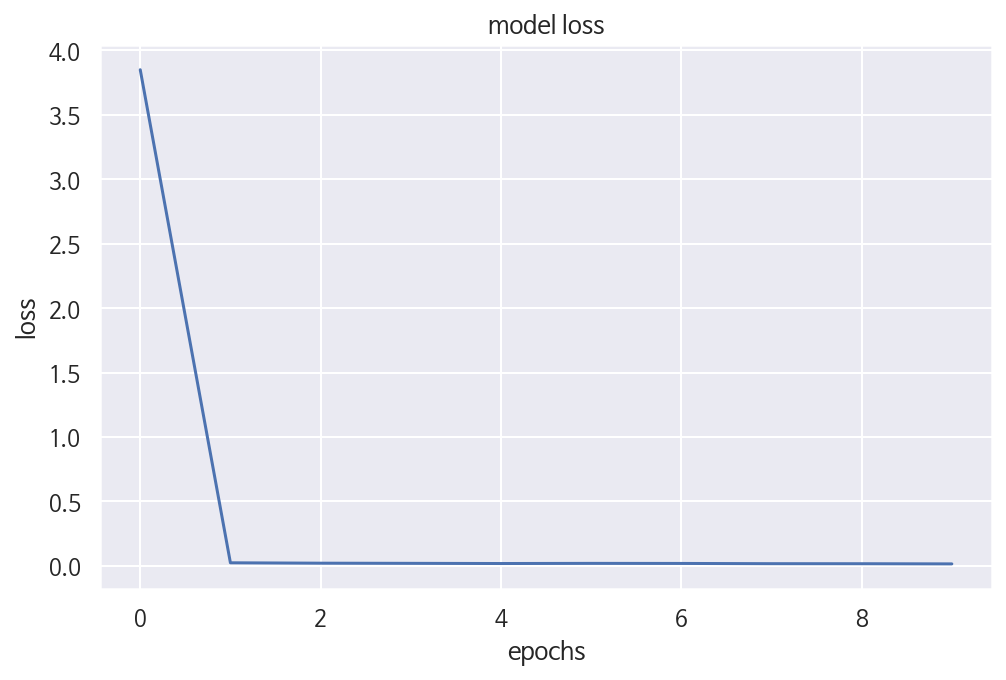

In [76]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [77]:
preds = model.predict(X_test)

In [78]:
preds[preds>=0.5] = 1
preds[preds<0.5] = 0

In [80]:
preds.shape

(2500, 17284)

## 예측한 태그의 갯수

In [81]:
preds.sum(axis=1)[:100]

array([ 5.,  0.,  5.,  0.,  0.,  8.,  8.,  0.,  0.,  0.,  6.,  0.,  1.,
        6.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  6.,  2.,  0.,  5.,
        3., 12.,  0., 21.,  6.,  8.,  0.,  2.,  0.,  0.,  0.,  0., 30.,
        0.,  0.,  5.,  0.,  0., 11.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,
        0.,  0., 11.,  0.,  0.,  0.,  0., 12.,  8.,  1.,  0., 46.,  0.,
        1.,  0.,  5.,  0.,  1., 28.,  0., 17.,  5.,  0., 49., 13.,  0.,
        1.,  0.,  1.,  0.,  7.,  2.,  0.,  0.,  0., 15.,  0.,  0.,  0.,
        6., 13.,  3.,  0.,  0.,  0.,  0.,  0.,  0.], dtype=float32)

## accuracy score

In [37]:
y_test = y_test.toarray()

In [79]:
# 1000건 데이터
np.sum(np.sum(y_test.astype(int) & preds.astype(int), axis=1) > 0) / y_test.shape[0]

0.324

In [60]:
# 1000건 데이터
np.sum(np.sum(y_test.astype(int) & preds.astype(int), axis=1) > 0) / y_test.shape[0]

0.3796

In [68]:
# 1000건 데이터
np.sum(np.sum(y_test.astype(int) & preds.astype(int), axis=1) > 0) / y_test.shape[0]

0.3392

In [122]:
# 10000건 데이터
np.sum(np.sum(y_test.astype(int) & preds.astype(int), axis=1) > 0) / y_test.shape[0]

0.3418

In [128]:
# 10만건 데이터
np.sum(np.sum(y_test.astype(int) & preds.astype(int), axis=1) > 0) / y_test.shape[0]

0.24504

In [160]:
np.sum(np.sum(y_test.astype(int) & preds.astype(int), axis=1) > 0) / y_test.shape[0]

0.25792

In [179]:
np.sum(np.sum(y_test.astype(int) & preds.astype(int), axis=1) > 0) / y_test.shape[0]

0.0

In [186]:
np.sum(np.sum(y_test.astype(int) & preds.astype(int), axis=1) > 0) / y_test.shape[0]

0.18288